In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!rm -r ../COVID-19/

In [3]:
!git clone https://github.com/CSSEGISandData/COVID-19.git ../COVID-19

Cloning into '../COVID-19'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15872 (delta 10), reused 15 (delta 8), pack-reused 15848
Receiving objects: 100% (15872/15872), 61.64 MiB | 57.52 MiB/s, done.
Resolving deltas: 100% (7768/7768), done.
Checking connectivity... done.


In [4]:
mypath = '../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'

In [5]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f != 'README.md' and f != '.gitignore']
onlyfiles.sort()

In [6]:
print(onlyfiles[0], onlyfiles[-1])

01-22-2020.csv 03-23-2020.csv


In [14]:
from datetime import datetime

In [23]:
f = '03-23-2020.csv'
df = pd.read_csv(mypath + f)
df = df[['Province_State', 'Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered']]
df.columns = ['Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']

In [24]:
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,South Carolina,US,2020-03-23 23:19:34,1,0,0
1,Louisiana,US,2020-03-23 23:19:34,1,0,0
2,Virginia,US,2020-03-23 23:19:34,1,0,0
3,Idaho,US,2020-03-23 23:19:34,13,0,0
4,Iowa,US,2020-03-23 23:19:34,1,0,0


In [25]:
i = 0
for f in onlyfiles:
    # data format changed on 3-23
    if datetime.strptime(f[:-4] , '%m-%d-%Y') < datetime.strptime('03-23-2020', '%m-%d-%Y'):
        df = pd.read_csv(mypath + f)
        df = df[['Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']]
        df = df.groupby(['Country/Region']).sum()
        df['Date'] = f[:-4]
        if i == 0:
            dfs = df
        if i > 0:
            dfs = pd.concat([dfs, df])
        i += 1
    else:
        df = pd.read_csv(mypath + f)
        df = df[['Province_State', 'Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered']]
        df.columns = ['Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']
        df = df.groupby(['Country/Region']).sum()
        df['Date'] = f[:-4]
        if i == 0:
            dfs = df
        if i > 0:
            dfs = pd.concat([dfs, df])
        i += 1

In [26]:
names = dfs.index.tolist()
names = [x.strip() for x in names]
changelist = [i for i, value in enumerate(names) if value == 'Mainland China']
for c in changelist: names[c] = 'China'
changelist = [i for i, value in enumerate(names) if value == 'Republic of Korea']
for c in changelist: names[c] = 'South Korea'
changelist = [i for i, value in enumerate(names) if value == 'Korea, South']
for c in changelist: names[c] = 'South Korea'
changelist = [i for i, value in enumerate(names) if value == 'Iran (Islamic Republic of)']
for c in changelist: names[c] = 'Iran'
changelist = [i for i, value in enumerate(names) if value == 'Iran (Islamic Republic of)']
for c in changelist: names[c] = 'Iran'
changelist = [i for i, value in enumerate(names) if value == 'occupied Palestinian territory']
for c in changelist: names[c] = 'Israel'
changelist = [i for i, value in enumerate(names) if value == 'United Kingdom']
for c in changelist: names[c] = 'UK'
changelist = [i for i, value in enumerate(names) if value == 'Hong Kong SAR']
for c in changelist: names[c] = 'Hong Kong'
changelist = [i for i, value in enumerate(names) if value == 'Taipei and environs']
for c in changelist: names[c] = 'Taiwan'
changelist = [i for i, value in enumerate(names) if value == 'Taiwan*']
for c in changelist: names[c] = 'Taiwan'
changelist = [i for i, value in enumerate(names) if value == 'Republic of Ireland']
for c in changelist: names[c] = 'Ireland'
changelist = [i for i, value in enumerate(names) if value == 'Czechia']
for c in changelist: names[c] = 'Czech Republic'
changelist = [i for i, value in enumerate(names) if value == 'Macau']
for c in changelist: names[c] = 'Macao'
changelist = [i for i, value in enumerate(names) if value == 'Macao SAR']
for c in changelist: names[c] = 'Macao'
changelist = [i for i, value in enumerate(names) if value == 'Republic of Moldova']
for c in changelist: names[c] = 'Moldova'
changelist = [i for i, value in enumerate(names) if value == 'Cote d\'Ivoire']
for c in changelist: names[c] = 'Ivory Coast'
changelist = [i for i, value in enumerate(names) if value == 'Viet Nam']
for c in changelist: names[c] = 'Vietnam'
changelist = [i for i, value in enumerate(names) if value == 'Russian Federation']
for c in changelist: names[c] = 'Russia'
changelist = [i for i, value in enumerate(names) if value == 'Congo (Kinshasa)']
for c in changelist: names[c] = 'Congo'
changelist = [i for i, value in enumerate(names) if value == 'DR Congo']
for c in changelist: names[c] = 'Congo'
changelist = [i for i, value in enumerate(names) if value == 'North Ireland']
for c in changelist: names[c] = 'Ireland'
changelist = [i for i, value in enumerate(names) if value == 'St. Martin']
for c in changelist: names[c] = 'Saint Martin'
dfs.index = names
dfs.index.rename('Country', inplace=True)
dfs['Date'] = pd.to_datetime(dfs['Date'])
dfs.head()

,Confirmed,Deaths,Recovered,Date
Country,,,,
Hong Kong,0.0,0.0,0.0,2020-01-22
Japan,2.0,0.0,0.0,2020-01-22
Macao,1.0,0.0,0.0,2020-01-22
China,547.0,17.0,28.0,2020-01-22
South Korea,1.0,0.0,0.0,2020-01-22


In [27]:
dfp = pd.read_csv('../populations.csv')
dfp.index = dfp.Country.values
dfp.drop(['Country'], axis=1, inplace=True)
dfp.index.rename('Country', inplace=True)
dfp.head()

,Population
Country,
China,1439323776
India,1380004385
US,331002651
Indonesia,273523615
Pakistan,220892340


In [28]:
dfsj = dfs.join(dfp, how='outer')
#dfsj['Population'] = dfsj['Population'].str.replace(',', '')
dfsj['Population'] = pd.to_numeric(dfsj['Population'])
dfsj.head()

,Confirmed,Deaths,Recovered,Date,Population
Country,,,,,
Afghanistan,1.0,0.0,0.0,2020-02-24,38928346.0
Afghanistan,1.0,0.0,0.0,2020-02-25,38928346.0
Afghanistan,1.0,0.0,0.0,2020-02-26,38928346.0
Afghanistan,1.0,0.0,0.0,2020-02-27,38928346.0
Afghanistan,1.0,0.0,0.0,2020-02-28,38928346.0


In [29]:
dfsj[dfsj.Population.isnull()].groupby('Country').max().sort_values('Confirmed', ascending=False)

,Confirmed,Deaths,Recovered,Date,Population
Country,,,,,
Cruise Ship,712.0,8.0,567.0,2020-03-23,NaN
Others,706.0,6.0,40.0,2020-03-10,NaN
Reunion,47.0,0.0,0.0,2020-03-22,NaN
"Bahamas, The",4.0,0.0,0.0,2020-03-22,NaN
Congo (Brazzaville),4.0,0.0,0.0,2020-03-23,NaN
Kosovo,2.0,0.0,0.0,2020-03-22,NaN
Jersey,2.0,0.0,0.0,2020-03-22,NaN
Faroe Islands,2.0,0.0,0.0,2020-03-10,NaN
"Gambia, The",1.0,0.0,0.0,2020-03-22,NaN


In [30]:
dfsj.dropna(inplace=True)
dfsj['PercPopConfirmed'] = 100* dfsj.Confirmed/dfsj.Population
dfsj['PercPopDeaths'] = 100* dfsj.Deaths/dfsj.Population

In [31]:
dfsj.reset_index(level=0, inplace=True)
dfsj.head()

,Country,Confirmed,Deaths,Recovered,Date,Population,PercPopConfirmed,PercPopDeaths
0,Afghanistan,1.0,0.0,0.0,2020-02-24,38928346.0,0.000003,0.0
1,Afghanistan,1.0,0.0,0.0,2020-02-25,38928346.0,0.000003,0.0
2,Afghanistan,1.0,0.0,0.0,2020-02-26,38928346.0,0.000003,0.0
3,Afghanistan,1.0,0.0,0.0,2020-02-27,38928346.0,0.000003,0.0
4,Afghanistan,1.0,0.0,0.0,2020-02-28,38928346.0,0.000003,0.0


In [32]:
dfsj['Country'][0]

'Afghanistan'

In [33]:
# dfsj.groupby('Country')['Date'].max()
dfsj.loc[dfsj.groupby(["Country"])["Date"].idxmax()].head()
# .sort_values('Perc_Pop_Deaths', ascending=False)

,Country,Confirmed,Deaths,Recovered,Date,Population,PercPopConfirmed,PercPopDeaths
28,Afghanistan,40.0,1.0,1.0,2020-03-23,38928346.0,0.000103,0.000003
43,Albania,104.0,4.0,2.0,2020-03-23,2877797.0,0.003614,0.000139
71,Algeria,230.0,17.0,65.0,2020-03-23,43851044.0,0.000525,0.000039
93,Andorra,133.0,1.0,1.0,2020-03-23,77265.0,0.172135,0.001294
97,Angola,3.0,0.0,0.0,2020-03-23,32866272.0,0.000009,0.000000


In [34]:
limit = 1500

In [35]:
dfsjm = pd.DataFrame(dfsj.groupby(['Country'])['Confirmed'].max()).sort_values('Confirmed', ascending=False)
plotlist = dfsjm[dfsjm['Confirmed'] > limit ].index.tolist()
#plotlist.pop(plotlist.index('China'))
plotlist

['China',
 'Italy',
 'US',
 'Spain',
 'Germany',
 'Iran',
 'France',
 'South Korea',
 'Switzerland',
 'UK',
 'Netherlands',
 'Austria',
 'Belgium',
 'Norway',
 'Canada',
 'Portugal',
 'Sweden',
 'Brazil',
 'Australia',
 'Denmark',
 'Turkey',
 'Malaysia']

In [36]:
dfplot = dfsj[dfsj.Country.isin(plotlist)]
dfplot.head()

,Country,Confirmed,Deaths,Recovered,Date,Population,PercPopConfirmed,PercPopDeaths
160,Australia,0.0,0.0,0.0,2020-01-23,25499884.0,0.000000,0.0
161,Australia,4.0,0.0,0.0,2020-01-25,25499884.0,0.000016,0.0
162,Australia,4.0,0.0,0.0,2020-01-26,25499884.0,0.000016,0.0
163,Australia,5.0,0.0,0.0,2020-01-27,25499884.0,0.000020,0.0
164,Australia,5.0,0.0,0.0,2020-01-28,25499884.0,0.000020,0.0


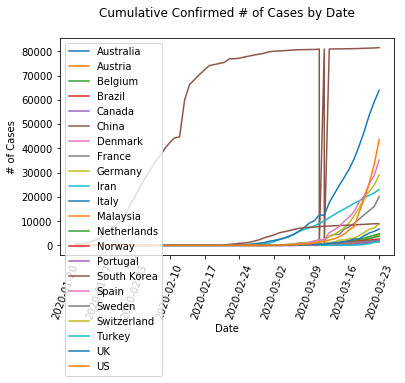

In [37]:
grpd = dfplot.groupby(['Country'])
for name, data in grpd:
    plt.plot('Date', 'Confirmed', data=data.sort_values('Date'), label = name)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# of Cases')
plt.title('Cumulative Confirmed # of Cases by Date\n')
plt.legend(loc='upper left')

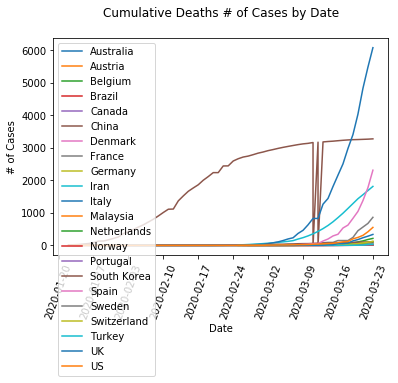

In [38]:
grpd = dfplot.groupby(['Country'])
for name, data in grpd:
    plt.plot('Date', 'Deaths', data=data.sort_values('Date'), label = name)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# of Cases')
plt.title('Cumulative Deaths # of Cases by Date\n')
plt.legend(loc='upper left')

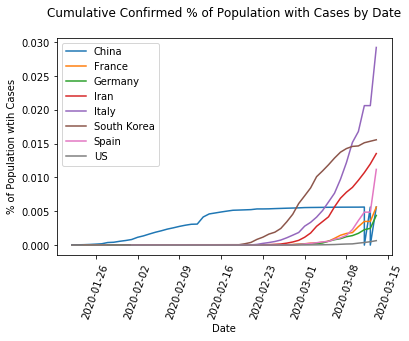

In [20]:
grpd = dfplot.groupby(['Country'])
for name, data in grpd:
    plt.plot('Date', 'PercPopConfirmed', data=data.sort_values('Date'), label = name)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('% of Population wtih Cases')
plt.title('Cumulative Confirmed % of Population with Cases by Date\n')
plt.legend(loc='upper left')

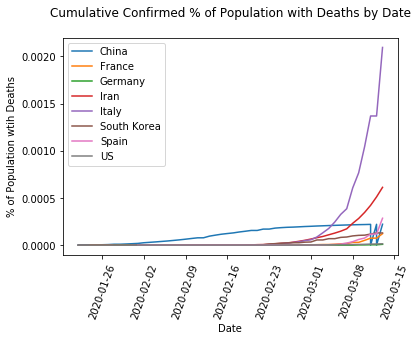

In [21]:
grpd = dfplot.groupby(['Country'])
for name, data in grpd:
    plt.plot('Date', 'PercPopDeaths', data=data.sort_values('Date'), label = name)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('% of Population wtih Deaths')
plt.title('Cumulative Confirmed % of Population with Deaths by Date\n')
plt.legend(loc='upper left')

In [38]:
x = pd.DataFrame(data=[0], columns=['x'])
y = pd.DataFrame(data=[1], columns=['x'])
z = pd.concat([x, y])

In [39]:
type(z)

pandas.core.frame.DataFrame

In [27]:
start =1
dfplots = dfplot[dfplot['Deaths'] > start]
grpd = dfplots.groupby(['Country'])

In [28]:
# maxlen = 0
# for name, data in grpd:
#     if maxlen < len(data):
#         maxlen = len(data)
#     print(name, len(data), maxlen)

# i = 0
# countries = {}
# for name, data in grpd:
#     countries[i,0] = name
#     countries[i,1] = [0]*(maxlen - len(data)) + data['Confirmed'].values.tolist()
#     i += 1

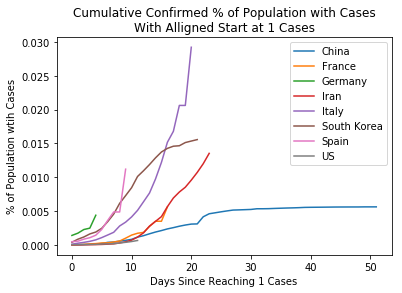

In [29]:
#plt.xticks(rotation=70)
for name, data in grpd:
    plt.plot(data.PercPopConfirmed.values, label = name)
plt.ylabel('% of Population wtih Cases')
plt.xlabel('Days Since Reaching ' + str(start) + ' Cases')
plt.title('Cumulative Confirmed % of Population with Cases\nWith Alligned Start at ' + str(start) + ' Cases')
plt.legend()

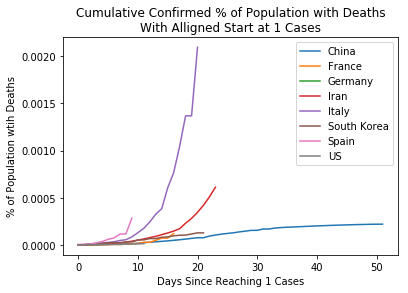

In [30]:
#plt.xticks(rotation=70)
for name, data in grpd:
    plt.plot(data.PercPopDeaths.values, label = name)
plt.ylabel('% of Population wtih Deaths')
plt.xlabel('Days Since Reaching ' + str(start) + ' Cases')
plt.title('Cumulative Confirmed % of Population with Deaths\nWith Alligned Start at ' + str(start) + ' Cases')
plt.legend()

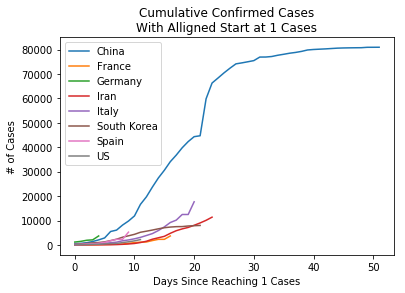

In [31]:
#plt.xticks(rotation=70)
for name, data in grpd:
    plt.plot(data.Confirmed.values, label = name)
plt.ylabel('# of Cases')
plt.xlabel('Days Since Reaching ' + str(start) + ' Cases')
plt.title('Cumulative Confirmed Cases\nWith Alligned Start at ' + str(start) + ' Cases')
plt.legend()

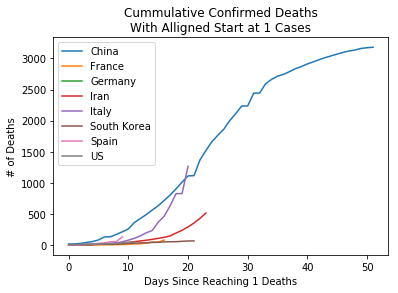

In [32]:
#plt.xticks(rotation=70)
for name, data in grpd:
    plt.plot(data.Deaths.values, label = name)
plt.ylabel('# of Deaths')
plt.xlabel('Days Since Reaching ' + str(start) + ' Deaths')
plt.title('Cummulative Confirmed Deaths\nWith Alligned Start at ' + str(start) + ' Cases')
plt.legend()